In [47]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time

In [48]:
def vdot(v, m, h, n, I, gNa, ENa, gK, EK, gL, EL, C):
  return ((I - gNa*(m**3)*h*(v - ENa) - gK*(n**4)*(v - EK) - gL*(v - EL))/C)

def mdot(m, v):
  return (am(v)*(1 - m) - bm(v)*m)

def hdot(h, v):
  return (ah(v)*(1 - h) - bh(v)*h)

def ndot(n, v):
  return (an(v)*(1 - n) - bn(v)*n)

def an(v):
  return 0.01*(55 + v)/(1- np.exp((-55 - v)/10))

def am(v):
  return 0.1*(40 + v)/(1 - np.exp((-40 - v)/10))

def ah(v):
  return 0.0027*np.exp(-v/20)

def bn(v):
  return 0.0555*np.exp(-v/80)

def bm(v):
  return 0.108*np.exp(-v/18)

def bh(v):
  return 1/(1+ np.exp((-35 - v)/10))


In [49]:
def HHmodel(t, y, I, gNa, ENa, gK, EK, gL, EL, C, pbar, state):

    #for progress bar
    last_t, dt = state
    time.sleep(0.1)
    n = int((t - last_t)/dt)
    pbar.update(n)
    state[0] = last_t + dt * n

    #model
    v, m, h, n = y
    dv = vdot(v, m, h, n, I, gNa, ENa, gK, EK, gL, EL, C)
    dm = mdot(m, v)
    dh = hdot(h, v)
    dn = ndot(n, v)
    return np.array([dv, dm, dh, dn])


In [50]:
gK = 36
gNa = 120
gL = 0.3

EK = -77
ENa = 50
EL = -54.402
C = 1

I = 0
#I = 6
#I = 25

t = 100
y0 = [-65, 0, 1, 0]
t_span = [0, t]
t_eval=np.linspace(0, t, 1000)

In [51]:

from tqdm import tqdm

with tqdm(total=100, unit="‰") as pbar:
      sol = solve_ivp(HHmodel, t_span, y0, t_eval=t_eval, args=(I, gNa, ENa, gK, EK, gL, EL, C, pbar, [0, t/100]))

100%|██████████| 100/100 [02:08<00:00,  1.29s/‰]


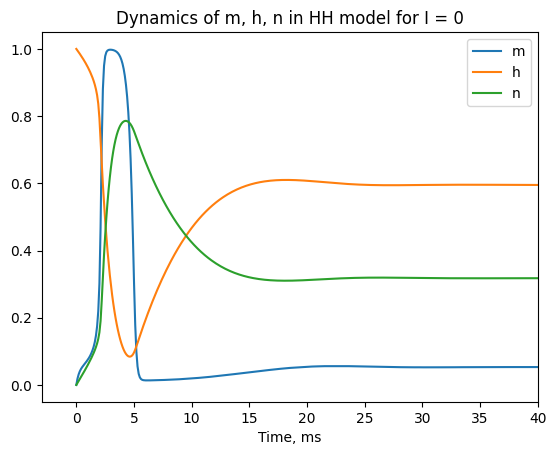

In [52]:
plt.plot(sol.t, sol.y[1], label='m')
plt.plot(sol.t, sol.y[2], label='h')
plt.plot(sol.t, sol.y[3], label='n')
plt.legend()
plt.xlim(-3, 40)
plt.xlabel('Time, ms')
plt.title('Dynamics of m, h, n in HH model for I = '+ str(I))
plt.show()

Text(0.5, 1.0, 'Dynamics of voltage in HH model for I = 0')

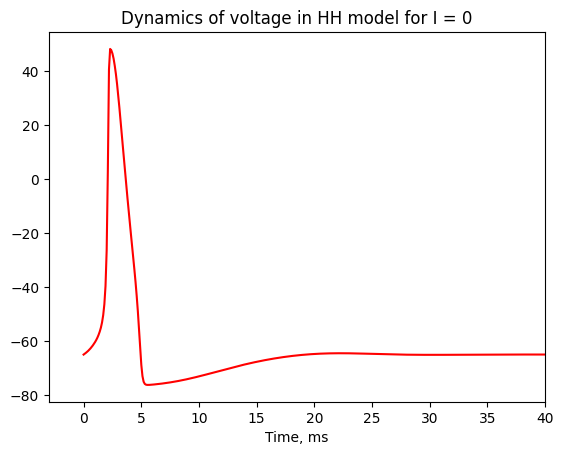

In [53]:
plt.plot(sol.t, sol.y[0], color='r')
plt.xlabel('Time, ms')
plt.xlim(-3, 40)
plt.title('Dynamics of voltage in HH model for I = '+ str(I))